



## ****EDA and Feature Selection for Twitter bot detection****


  - Loading Data

  - Initial Inspection

  - Discarding Features

  - EDA/Feature Engineering
    
**Summary**

In this section we perform data cleaning and EDA on the human and bot tweet-level dataset. Results of analyzing features indicated that the most useful fields for our classification efforts are: lexical_diversity,followers_count,friends_count,default_profile

**Loading Data**

This dataset is comprised of about 50,000 human tweets and 60,000 bot tweets. There are 26 features and one response. The tweet content is in a column called 'text' within the tweets.csv files. The 'user_type' is our response variable and contains a 1 if the account is a bot.

To conduct our analysis, first we import all the modules and functions we will use in this stage of analysis

In [444]:

import os,sys, csv, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

**Summary**

In this section we perform EDA on the human and bot tweet-level dataset. Results of analyzing features indicated that the most useful fields for our classification efforts are:statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,geo_enabled,profile_use_background_image,verified and protected . Engineered fields that could support classification is lexical diversity field.

In [495]:
filepath = '/Users/smukherjee5/cs109_final_project/cs109a/data/'
bots = pd.read_csv(filepath+'bot_users_100.csv')
nonbots = pd.read_csv(filepath + 'human_users_100.csv')
sbots= pd.read_csv(filepath + 'social_users_100.csv')
bot_tweets = pd.read_csv(filepath + 'bot_tweets_100.csv')
nonbots_tweets = pd.read_csv(filepath + 'human_tweets_100.csv')
sbot_tweets = pd.read_csv(filepath + 'social_tweets_100.csv')

nonbots_tweets = nonbots_tweets.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
bot_tweets = bot_tweets.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
sbot_tweets = sbot_tweets.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

tweets=pd.concat([nonbots_tweets, bot_tweets,sbot_tweets], sort=False)

nonbots = nonbots.drop(["Unnamed: 0", "Unnamed: 0.1","test_set_1","test_set_2"], axis=1)
bots = bots.drop(["Unnamed: 0", "Unnamed: 0.1","Unnamed: 0.1.1"], axis=1)
sbots = sbots.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
users = pd.concat([bots, nonbots,sbots], sort=False)
users.fillna(0)
users.head(2)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,counts,user_type
0,64987143.0,Fake Taylor S,TaylorSFaklhh,1,62,1489,0,0,NaN,en,NaN,NaN,NaN,NaN,NaN,http://a2.twimg.com/profile_images/359639810/3_normal.jpeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://s.twimg.com/a/1287010001/images/themes/theme1/bg.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250067973000L,2009-08-12 11:06:13,2010-11-07 11:10:52,2016-03-14 17:08:08,1,0
1,72795613.0,Katherine,Katherine9e5b,1,98,411,0,0,http://wowurl.com/13qp,en,NaN,NaN,NaN,NaN,NaN,http://a0.twimg.com/profile_images/406283036/zme__1129__normal.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://s.twimg.com/a/1288305442/images/themes/theme1/bg.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252481862000L,2009-09-09 09:37:42,2010-11-07 11:10:52,2016-03-14 17:09:04,1,0


In [446]:
display(users.columns)
display(users.size)

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'counts',
       'user_type'],
      dtype='object')

18522

In [447]:
display(users.head(5))
users.describe()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,counts,user_type
0,64987143.0,Fake Taylor S,TaylorSFaklhh,1,62,1489,0,0,NaN,en,NaN,NaN,NaN,NaN,NaN,http://a2.twimg.com/profile_images/359639810/3_normal.jpeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://s.twimg.com/a/1287010001/images/themes/theme1/bg.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250067973000L,2009-08-12 11:06:13,2010-11-07 11:10:52,2016-03-14 17:08:08,1,0
1,72795613.0,Katherine,Katherine9e5b,1,98,411,0,0,http://wowurl.com/13qp,en,NaN,NaN,NaN,NaN,NaN,http://a0.twimg.com/profile_images/406283036/zme__1129__normal.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://s.twimg.com/a/1288305442/images/themes/theme1/bg.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252481862000L,2009-09-09 09:37:42,2010-11-07 11:10:52,2016-03-14 17:09:04,1,0
2,53780486.0,Mom3CuteBoys,Mom3CuteBo38991,1,39,285,0,0,NaN,en,NaN,NaN,NaN,NaN,NaN,http://a1.twimg.com/profile_images/298701313/30_normal.jpeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://s.twimg.com/a/1288305442/images/themes/theme1/bg.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1246747718000L,2009-07-05 00:48:38,2010-11-07 11:10:52,2016-03-14 17:07:17,1,0
3,64982724.0,Nancy,Nancy84pg,1,119,673,0,2,http://xurl.jp/180a,en,NaN,NaN,NaN,NaN,NaN,http://a0.twimg.com/profile_images/358633404/zzzzzzzzzscenegirl-1045_normal.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://s.twimg.com/a/1288660386/images/themes/theme1/bg.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250066360000L,2009-08-12 10:39:20,2010-11-07 11:10:52,2016-03-14 17:08:08,1,0
4,69509049.0,Chelsea,Chelsea9j2k,1,189,606,0,0,http://wowurl.com/175,en,NaN,NaN,NaN,NaN,NaN,http://s.twimg.com/a/1287010001/images/default_profile_1_normal.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://s.twimg.com/a/1287437169/images/themes/theme1/bg.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1251435453000L,2009-08-28 06:57:33,2010-11-07 11:10:52,2016-03-14 17:08:49,1,0


,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,counts,user_type
count,4.410000e+02,441.000000,441.000000,441.000000,441.000000,441.000000,51.0,2.0,54.0,191.0,120.0,56.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,441.000000,441.000000
mean,7.998491e+08,435.176871,792.655329,1152.913832,149.439909,12.965986,1.0,1.0,1.0,1.0,1.0,-1414.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273.002268,0.226757
std,1.030561e+09,1866.001705,3058.110522,2676.219724,866.915846,144.810224,0.0,0.0,0.0,0.0,0.0,22334.021570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508.018761,0.419210
min,8.872810e+05,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-36000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,5.533554e+07,20.000000,20.000000,46.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-18000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,0.000000
50%,9.444566e+07,58.000000,117.000000,476.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-14400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.000000
75%,2.285711e+09,321.000000,485.000000,1515.000000,2.000000,3.000000,1.0,1.0,1.0,1.0,1.0,18450.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321.000000,0.000000
max,2.386078e+09,22993.000000,40368.000000,34504.000000,10968.000000,2858.000000,1.0,1.0,1.0,1.0,1.0,43200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3200.000000,1.000000


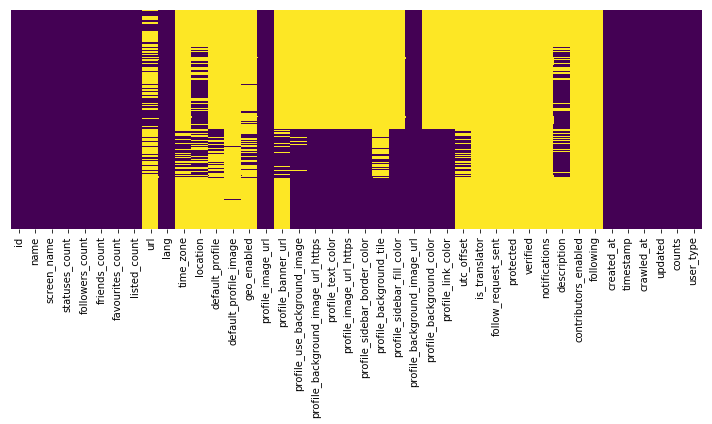

In [448]:
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(users)

**Features to discard for this analysis**

Analyzing the describe output and heatmap shows us that seven of the features are empty or have 0 for every value: 'is_translator', 'follow_request_sent', 'protected', 'verified', 'notifications', 'contributors_enabled'.

Other fields that are researcher or twitter generated metadata that we will remove are id, utc_offset,timestamp,crawled_at,created_at.

In [449]:
remove = ['is_translator', 'follow_request_sent', 'protected', 'verified', 'notifications', 'contributors_enabled','utc_offset', 'timestamp', 'crawled_at', 'created_at']
users = users.drop(columns=remove, axis=1)

**EDA/Feature Engineering**


Next we try to plot correlation matrix for bots and humans

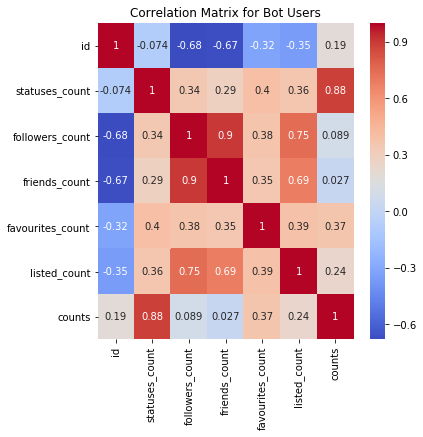

In [450]:
bots = users[users['user_type']==0]
bots_corr = bots.drop(['default_profile','default_profile_image','geo_enabled','profile_use_background_image','following','user_type','profile_background_tile'], axis=1)
plt.figure(figsize=(6,6))
sns.heatmap(bots_corr.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.title('Correlation Matrix for Bot Users')
plt.show()


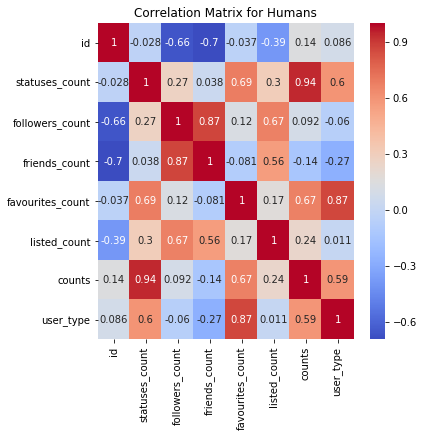

In [451]:
humans = users[users['user_type']==1]
human_corr = users.drop(['default_profile','default_profile_image','geo_enabled','profile_use_background_image','following','profile_background_tile'], axis=1)
plt.figure(figsize=(6,6))
sns.heatmap(human_corr.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.title('Correlation Matrix for Humans')
plt.show()


Result:

There is very little correlation between friends count and statuses_count, high correlation between friends_count and followers_count for bots.There is comparatively lesser correlation between friends_count and followers_count for humans, but still strong.

In human data there is no correlation between favorites count and friends count.


Next we do a scatter plot between followers and friends for bots and humans.

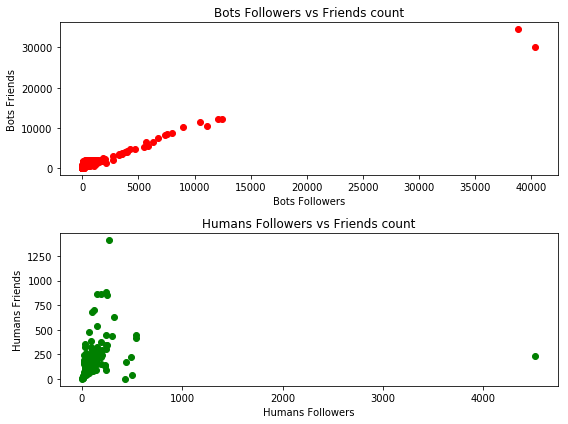

In [452]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
bots_followers = bots.followers_count
bots_friends = bots.friends_count

plt.scatter(bots_followers, bots_friends, color='red')
plt.xlabel("Bots Followers")
plt.ylabel("Bots Friends")
plt.title("Bots Followers vs Friends count")

plt.subplot(2, 1, 2)
human_followers = humans.followers_count
human_friends = humans.friends_count

plt.scatter(human_followers, human_friends, color='green')
plt.xlabel("Humans Followers")
plt.ylabel("Humans Friends")
plt.title("Humans Followers vs Friends count")

plt.tight_layout()
plt.show()

There is a linear pattern for Followers vs Friends for bots, and the numbers are way higher for bots as compared to humans.

**Translating boolean features to binary**

In [453]:
users["default_profile"] = (users["default_profile"] == True).astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py

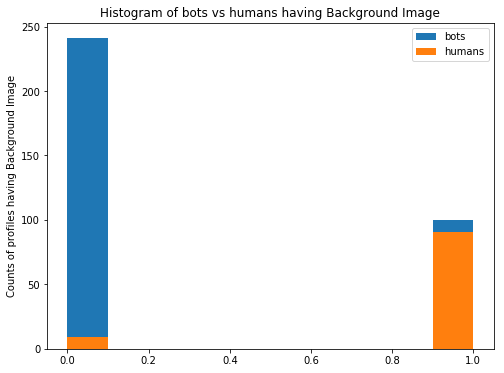

In [494]:
import numpy as np

plt.figure(figsize=(8,6))
#plt.subplot(2, 1, 1)
bots_uses_bg_img = bots.profile_use_background_image
bots_uses_bg_img[np.isnan(bots_uses_bg_img)] = 0
humans_uses_bg_img = nonbots.profile_use_background_image
humans_uses_bg_img[np.isnan(humans_uses_bg_img)] = 0

plt.hist(bots_uses_bg_img,label='bots')
plt.hist(humans_uses_bg_img,label='humans')
plt.ylabel("Counts of profiles having Background Image")
plt.title("Histogram of bots vs humans having Background Image")
plt.legend()


Bots tend to have more background images as compared to humans

Next we want to merge the tweets and user content to see how lexical diversity varies wrt bots and humans

In [455]:
remove = ['geo', 'contributors', 'favorited', 'counts', 'possibly_sensitive', 'retweeted', 'reply_count','in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','id', 'source', 'created_at', 'crawled_at', 'updated', 'timestamp']
tweets = tweets.drop(columns=remove, axis=1)
tweets_with_accounts = pd.merge(users, tweets, left_on="id", right_on="user_id",  suffixes=('_left', '_right'))

tweets_with_accounts.drop(list(df.filter(regex = '_right')), axis = 1, inplace = True)
tweets_with_accounts.describe()


,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,following,counts,user_type_left,user_id,truncated,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,user_type_right
count,1.203940e+05,120394.000000,120394.000000,120394.000000,120394.000000,120394.000000,120394.000000,497.0,33614.0,55946.0,20561.0,0.0,120394.000000,120394.000000,1.203940e+05,354.0,1.203940e+05,120394.000000,120394.000000,120394.000000,120394.000000,120394.000000
mean,6.175252e+08,2166.808504,3079.716788,2994.991586,337.761633,99.183780,0.189827,1.0,1.0,1.0,1.0,NaN,1216.209961,0.410386,6.175252e+08,1.0,3.223074e+02,0.116235,0.202867,0.491362,0.460214,0.410386
std,9.033170e+08,3846.129428,7610.199207,6121.018369,1320.242180,466.976654,0.392166,0.0,0.0,0.0,0.0,NaN,1131.212730,0.491906,9.033170e+08,0.0,1.771989e+04,0.732170,0.635952,0.517175,0.874003,0.491906
min,8.872810e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,NaN,1.000000,0.000000,8.872810e+05,1.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.896226e+07,395.000000,76.000000,153.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,NaN,395.000000,0.000000,3.896226e+07,1.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.895294e+07,751.000000,450.000000,680.000000,2.000000,4.000000,0.000000,1.0,1.0,1.0,1.0,NaN,711.000000,0.000000,7.895294e+07,1.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.044007e+08,2467.000000,2782.000000,2275.000000,100.000000,13.000000,0.000000,1.0,1.0,1.0,1.0,NaN,2221.000000,1.000000,6.044007e+08,1.0,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.386078e+09,22993.000000,40368.000000,34504.000000,10968.000000,2858.000000,1.000000,1.0,1.0,1.0,1.0,NaN,3200.000000,1.000000,2.386078e+09,1.0,3.350110e+06,54.000000,28.000000,4.000000,17.000000,1.000000


In [456]:
def lexical_diversity(text):
  if len(text) == 0:
    diversity = 0
  else: 
   diversity = float(len(set(text))) / len(text)
  return diversity

In [467]:
grouped_bots = tweets_with_accounts[(tweets_with_accounts.user_type_left == 0)].groupby(['screen_name','user_id'])
diversity_bots=grouped_bots.apply(lexical_diversity)
grouped_humans = tweets_with_accounts[(tweets_with_accounts.user_type_left==1)].groupby(['screen_name','user_id'])
diversity_humans=grouped_humans.apply(lexical_diversity)

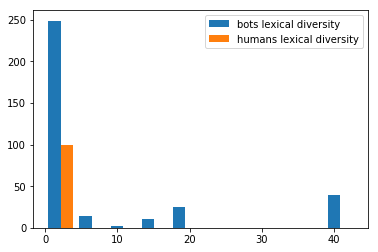

In [490]:
plt.figure()
plt.hist([diversity_bots,diversity_humans])
plt.legend(['bots lexical diversity', 'humans lexical diversity'])
plt.show()

We do see that humans are more lexically diverse than bots.

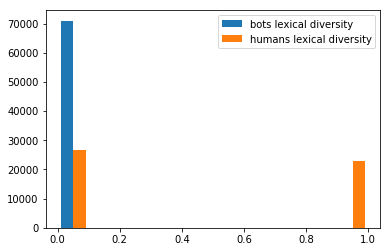

In [492]:
plt.figure()
plt.hist([tweets_with_accounts[(tweets_with_accounts.user_type_left == 0)].default_profile,tweets_with_accounts[(tweets_with_accounts.user_type_left == 1)].default_profile])
plt.legend(['bots default profile', 'humans default profile'])
plt.show()

Turns out humans tend to have more default profile than bots.